# Code for making summary plots of convergence diagnostics

We generate summary plots of convergence statistics for paper. 

In [1]:
import os
import numpy as np 
from ete3 import Tree
import matplotlib.pyplot as plt

In [2]:
folder_runs = '../_root-experiment/runs/'#'_sim-30-leaves/runs_v2/15287225176595236/'
simtree = '../data/chazot_subtree.nw' #'../chazot_subtree.nw'#'simulation-setup/symmetric_sim.nw'
datasets = os.listdir(folder_runs) # use all chains in data seed folder 
datasets = [d for d in datasets if d not in ['figures', '_convergence_diagnostics_all.pdf']]
print(datasets)

['7680677238277473', '10953749833646560']


In [3]:
# get inner idx 
tree = Tree(simtree)
leafidx = []
inneridx = []
i = 0
for node in tree.traverse('levelorder'):
    if node.is_leaf():
        print(node.name)
        leafidx.append(i)
    else:
        inneridx.append(i)
    i+=1
print(leafidx)
print(inneridx)

niepelti
theseus
hercules
amphitryon
telemachus
[3, 4, 5, 7, 8]
[0, 1, 2, 6]


In [4]:
# read in Rhat values 
rhats = []
for dataset in datasets:
    dirs = os.listdir(folder_runs + dataset)
    cres = [d for d in dirs if d[0] in ['_']]
    rhats.append(np.genfromtxt(folder_runs + dataset + '/' + cres[0] + '/stats/rhats_paths.csv', delimiter=','))

In [5]:
all_rhats = np.array(rhats)
all_rhats_inner = all_rhats[:,inneridx,:]
all_rhats_inner.flatten().shape

(320,)

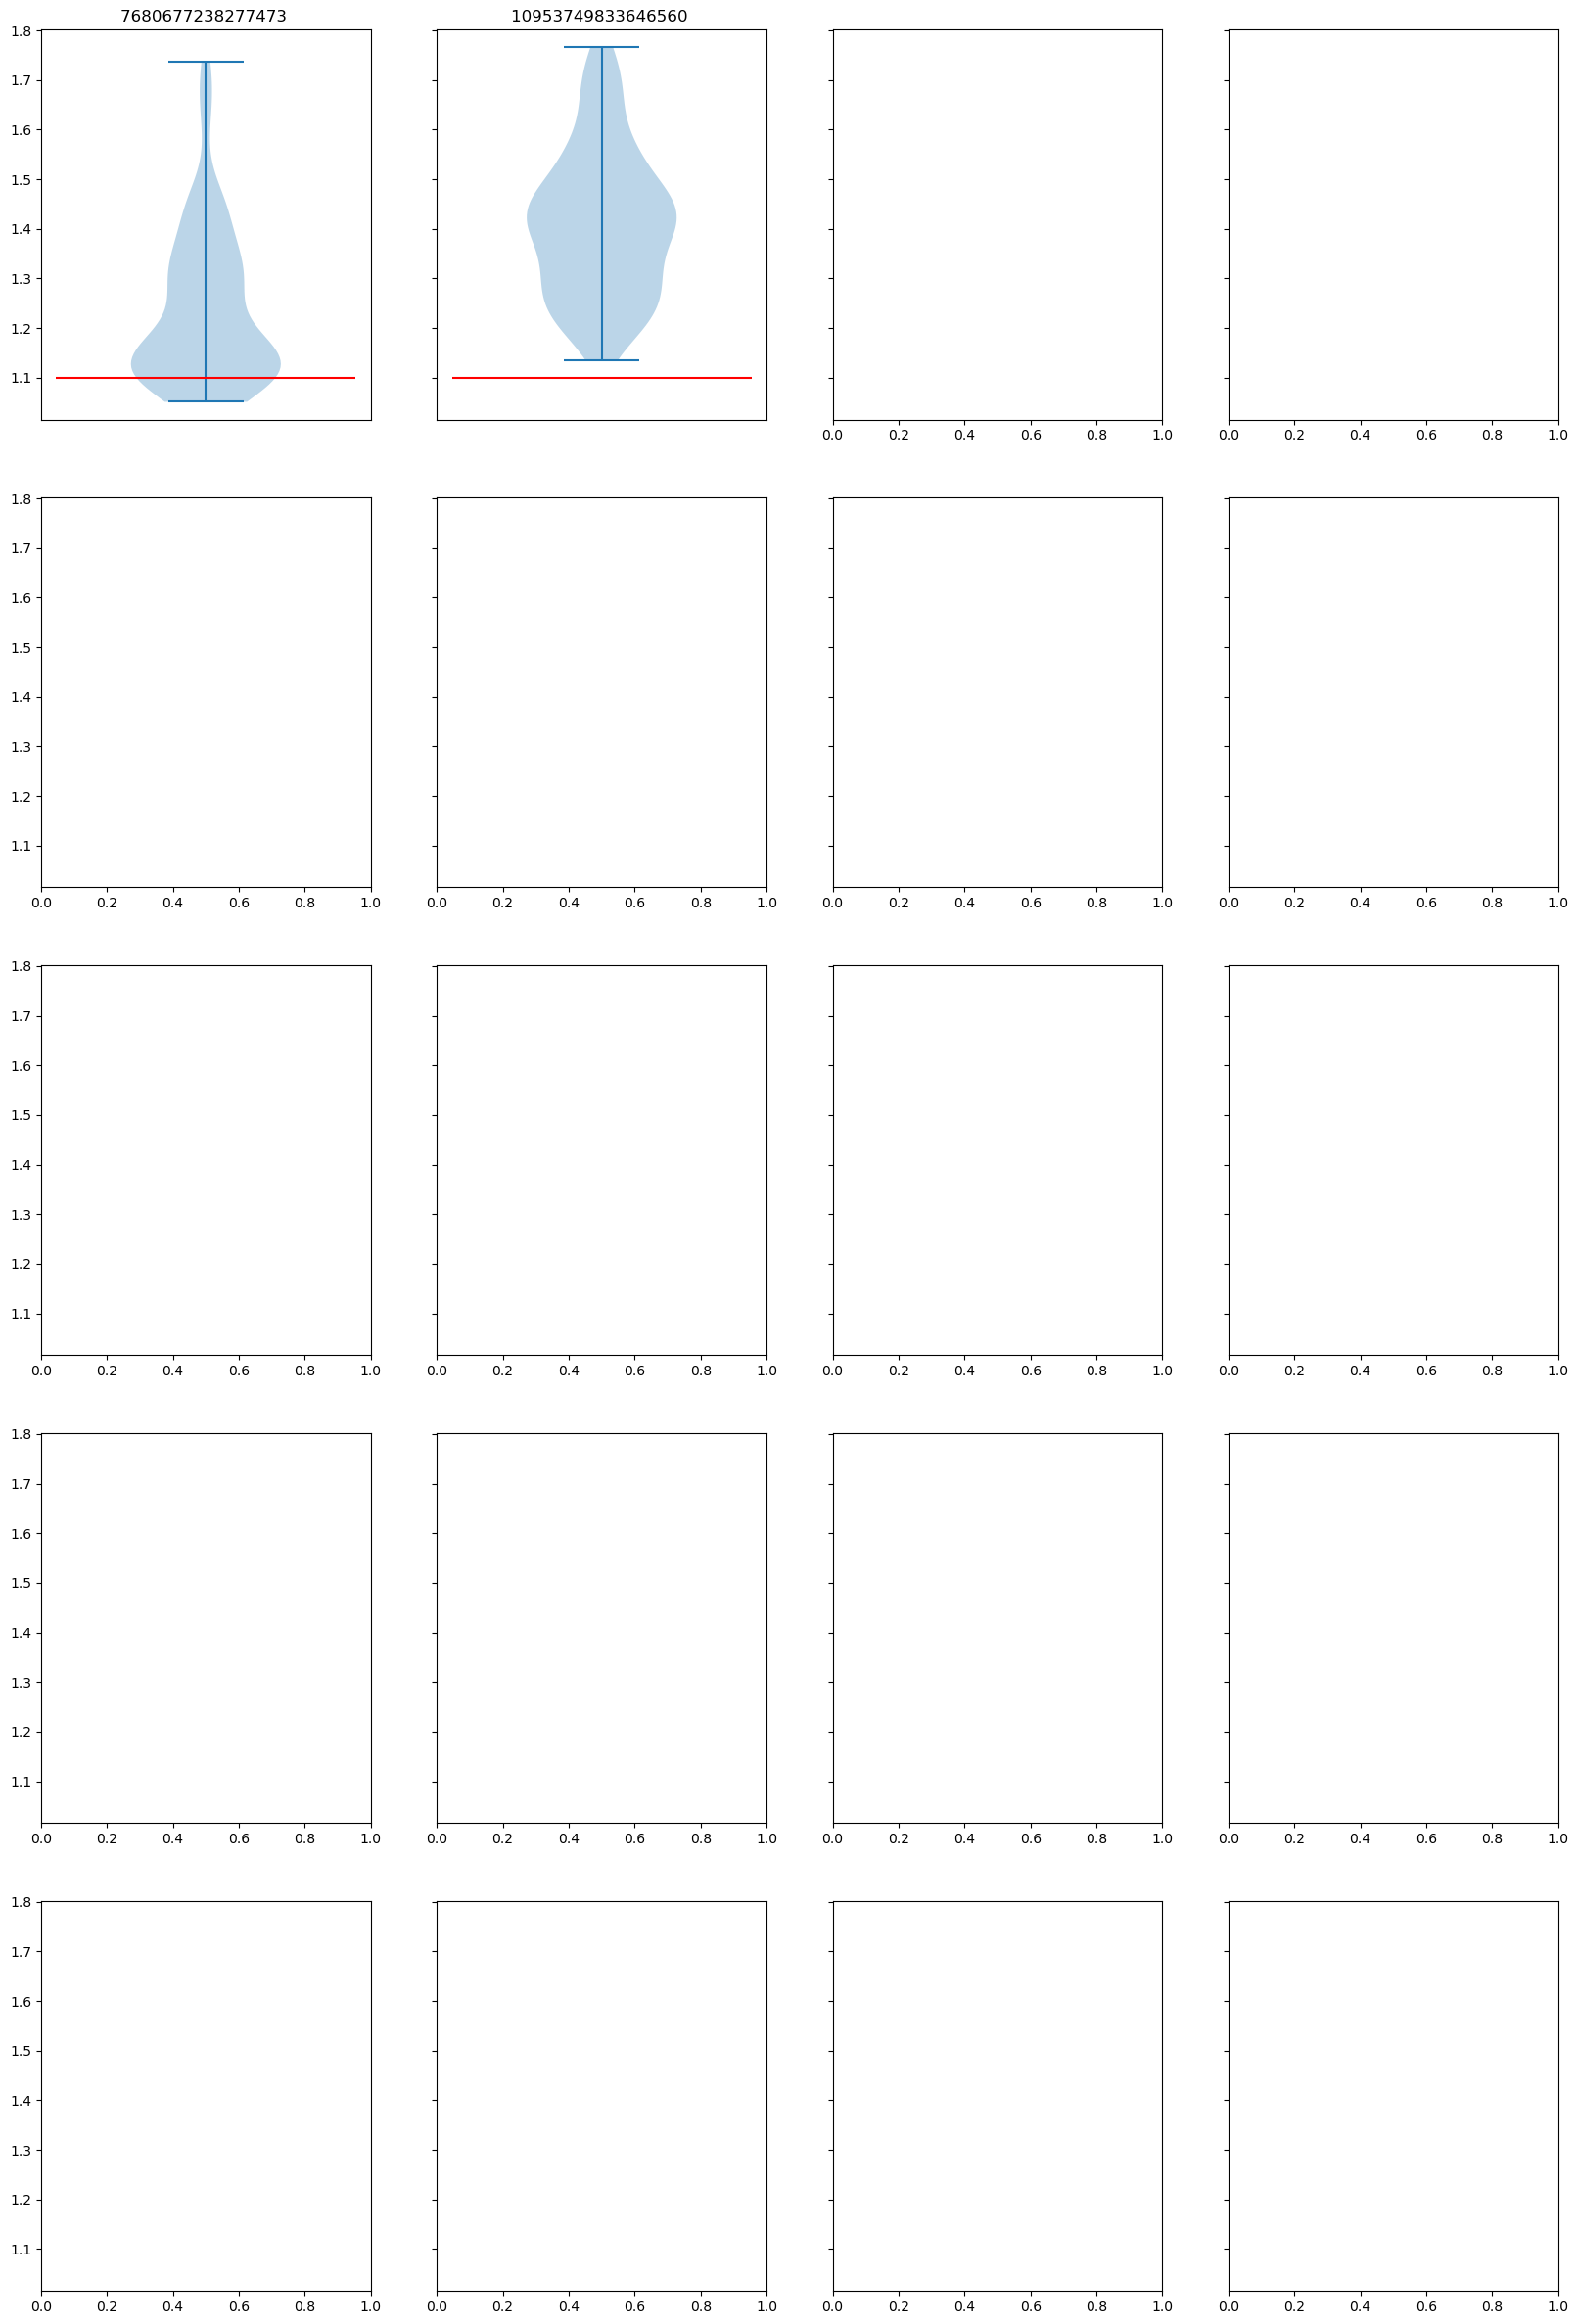

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(20,30), sharey=True)
for i, ax in enumerate(fig.axes):
    #for l in range(all_rhats_inner.shape[0]):
    if i >= len(datasets):
        break
    ax.violinplot(all_rhats_inner[i,:,:].flatten())
    ax.set_title(f'{datasets[i]} ')
    ax.hlines(y=1.1, xmin=0.5, xmax=1.5, color='r')
    ax.set_xticks([])
fig.savefig(folder_runs+'/_convergence_diagnostics_all.pdf')